# Heart Failure Prediction



The dataset provided is related to heart disease prediction, which is crucial for understanding and addressing cardiovascular health issues. It includes a variety of features that contribute to assessing an individual's risk for heart disease.

1. Age: Represents the age of the individual, an important factor in assessing heart disease risk.
2. Sex: Indicates the gender of the individual (M for male, F for female), which can influence cardiovascular health.
3. ChestPainType: Categorizes the type of chest pain experienced (e.g., ATA - Atypical Angina, NAP - Non-Anginal Pain, ASY - Asymptomatic), providing insights into potential heart-related issues.
4.RestingBP: The resting blood pressure of the individual, measured in mmHg, which is a critical indicator of heart health.
5.Cholesterol: Total serum cholesterol levels, measured in mg/dL, which can impact heart disease risk.
6.FastingBS: Fasting blood sugar levels (0 for normal, 1 for high), helping assess metabolic health.
7.RestingECG: Results of the resting electrocardiogram (Normal, ST - ST-T Wave Abnormality, LVH - Left Ventricular Hypertrophy), which indicates the electrical activity of the heart.
8.MaxHR: Maximum heart rate achieved during exercise, which reflects cardiovascular fitness and potential heart issues.
9.xerciseAngina: Indicates whether the individual experiences angina (chest pain) during exercise (Y for yes, N for no), a significant symptom of heart disease.
10.Oldpeak: Represents the ST depression induced by exercise relative to rest, an important diagnostic measure.
11.ST_Slope: Describes the slope of the peak exercise ST segment (Up, Flat, Down), providing further insight into cardiac function.
12.HeartDisease: The target variable (0 for no heart disease, 1 for heart disease), indicating the presence or absence of heart disease, which is the primary focus of the prediction model.

This dataset is valuable for building predictive models to identify individuals at risk of heart disease, allowing for early intervention and better health outcomes. Analyzing the relationships between these features and heart disease can help improve understanding and treatment of cardiovascular conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
#load Dataset
df = pd.read_csv('/content/drive/MyDrive/ML/Classification project/Heart Failure.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,54.291509,132.870755,197.458491,0.254717,135.082075,0.943679,0.580189
std,9.501201,18.244310,108.939463,0.435908,25.150348,1.072406,0.493761
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,48.000000,120.000000,171.000000,0.000000,118.000000,0.000000,0.000000
50%,55.000000,130.000000,221.000000,0.000000,135.000000,0.800000,1.000000
75%,61.000000,140.250000,266.000000,1.000000,154.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(1060, 12)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
#check for duplicates
df.duplicated().mean()*100

13.39622641509434

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] Age
****************************************************************************************************
['M' 'F'] Sex
****************************************************************************************************
['ATA' 'NAP' 'ASY' 'TA'] ChestPainType
****************************************************************************************************
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] RestingBP
****************************************************************************************************
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 

In [11]:
print(f"Missing values: {df.isnull().sum() * 100/len(df)}")

Missing values: Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


#**Data Visualization**

<ipython-input-12-e03ba2830a6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='Reds')


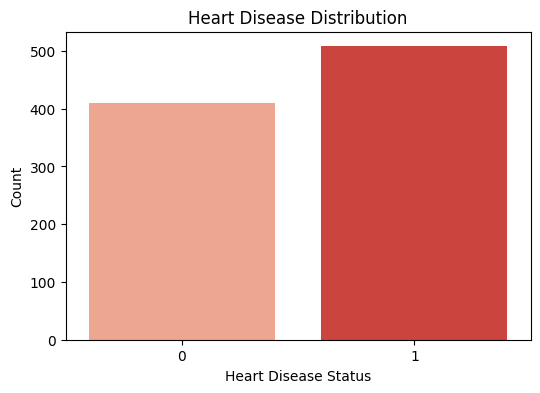

In [12]:
heart_disease_counts = df['HeartDisease'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='Reds')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

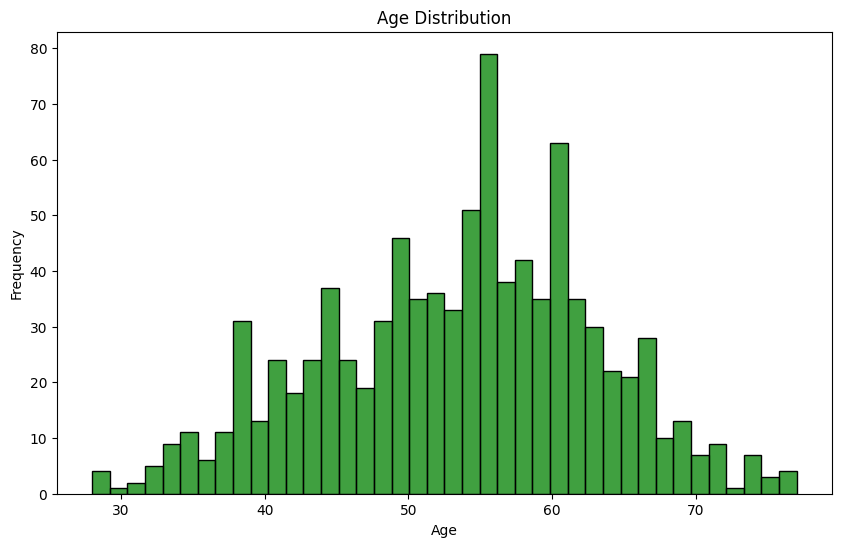

In [13]:
# Show age distribution
plt.figure(figsize=(10, 6))

sns.histplot(df['Age'], bins=40, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
ChestPainType = df['ChestPainType'].value_counts()
ChestPainType

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


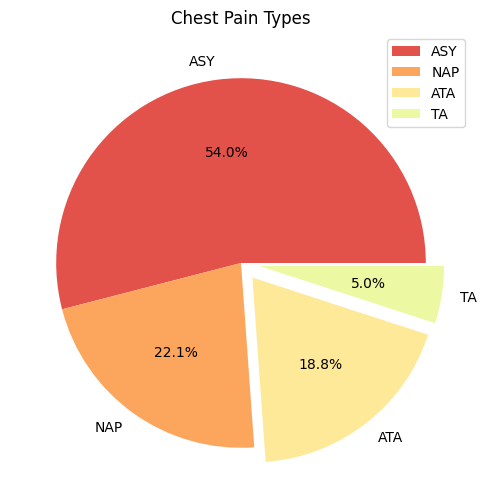

In [15]:
plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.0, 0.0, 0.1, 0.1], colors=sns.color_palette('Spectral'))
plt.title('Chest Pain Types')
plt.legend()
plt.show()

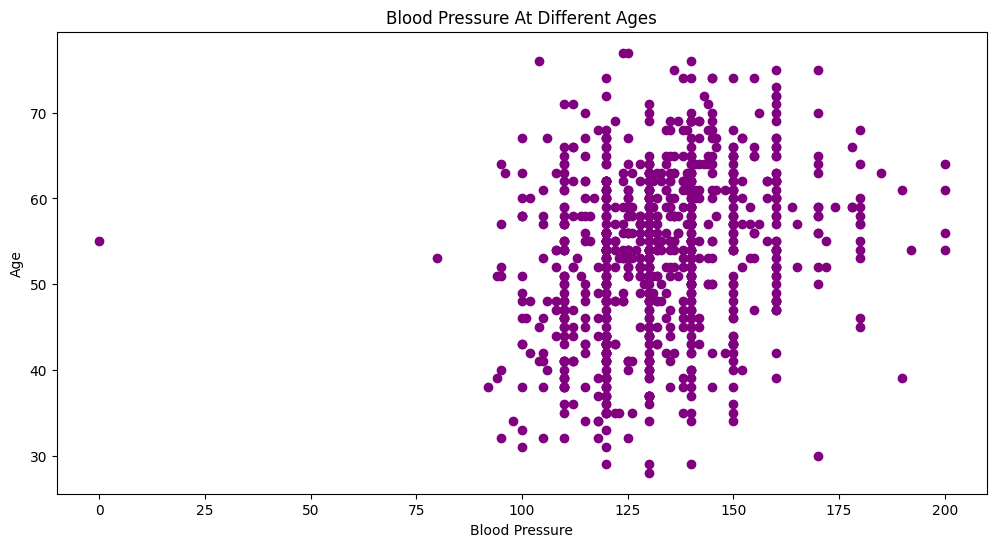

In [16]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(12, 6))
plt.scatter(df['RestingBP'], df['Age'], color='purple')
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

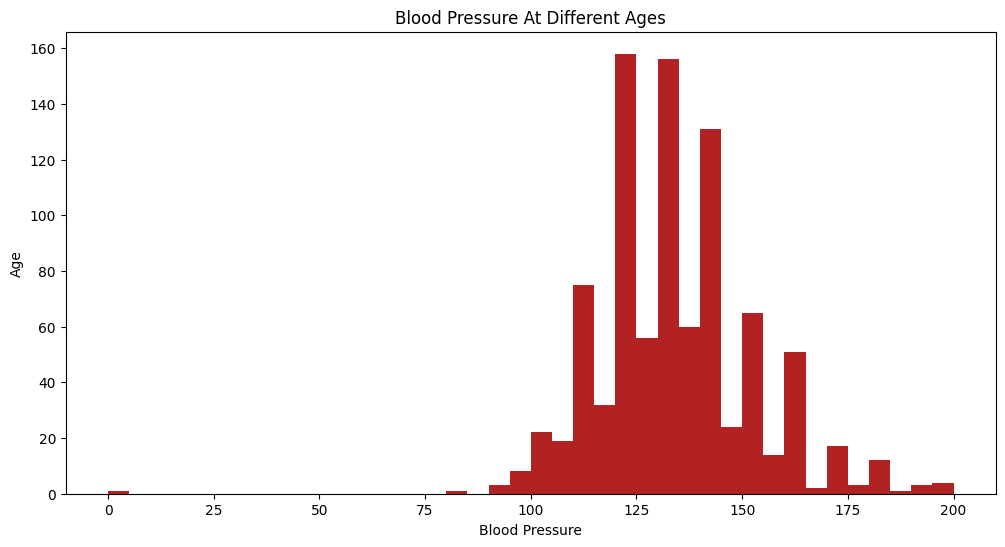

In [17]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(12, 6))
plt.hist(df['RestingBP'], bins=40, color='firebrick')
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

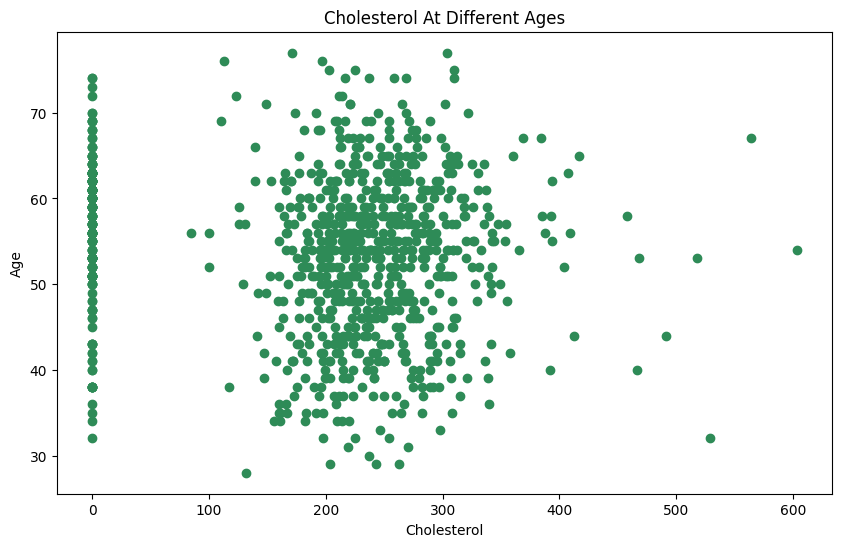

In [18]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['Cholesterol'], df['Age'], color='seagreen')
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In [19]:
RestingECG = df['RestingECG'].value_counts()
RestingECG

,count
RestingECG,
Normal,552
LVH,188
ST,178


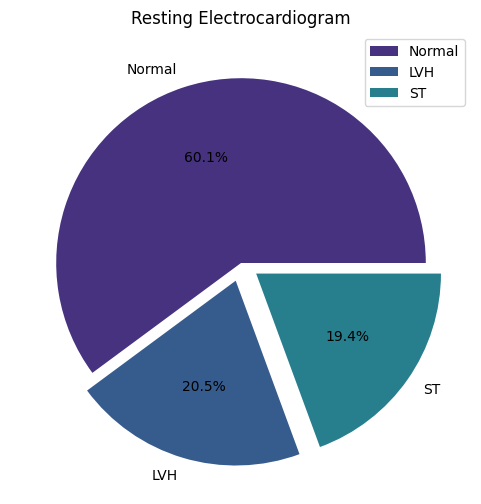

In [20]:
# Show resting electrocardiogram
plt.figure(figsize=(6, 6))
plt.pie(RestingECG, labels=['Normal', 'LVH', 'ST'],
                    autopct='%1.1f%%', shadow=False,
                    explode=[0.0, 0.1, 0.1], colors=sns.mpl_palette("viridis"))
plt.title('Resting Electrocardiogram')
plt.legend()
plt.show()

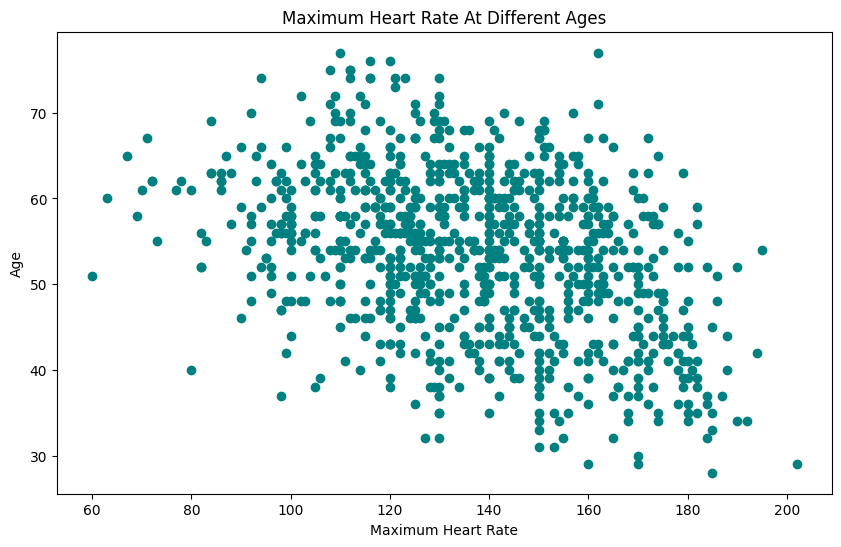

In [21]:
# Show Maximum Heart Rate At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['MaxHR'], df['Age'], color='teal')
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()

# Data Cleaning

In [22]:
#Data Cleaning - Replace zero values in 'RestingBP' and 'Cholesterol' with median values
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].median())
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [24]:
# Convert categorical variables if there are any
df = pd.get_dummies(df, drop_first=True)


In [25]:
# Convert categorical variables using one-hot encoding
#categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
#df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [26]:
# Display cleaned dataset
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [27]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), int64(6

In [29]:
df_corr = df.corr()
df_corr["HeartDisease"].sort_values(ascending = False)

,HeartDisease
HeartDisease,1.000000
ST_Slope_Flat,0.554134
ExerciseAngina_Y,0.494282
Oldpeak,0.403951
Sex_M,0.305445
Age,0.282039
FastingBS,0.267291
RestingBP,0.117798
RestingECG_ST,0.102527
Cholesterol,0.042988


# Removing Outliers

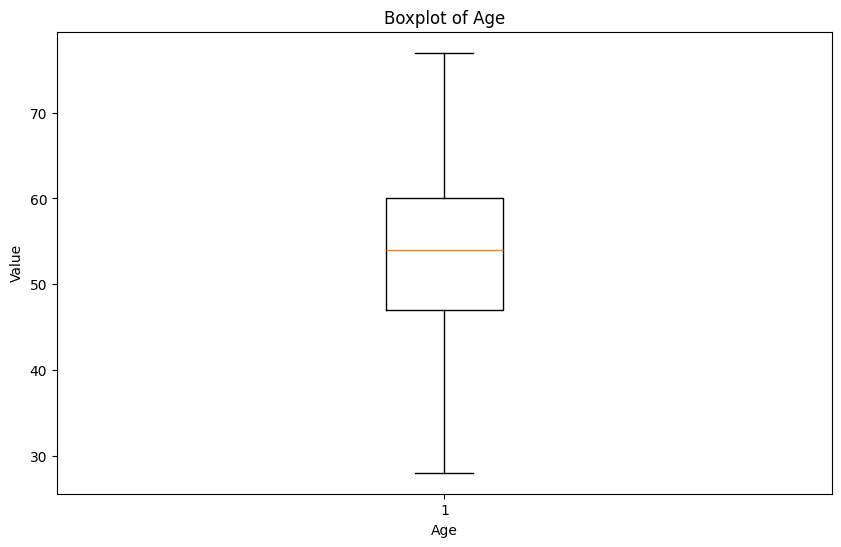

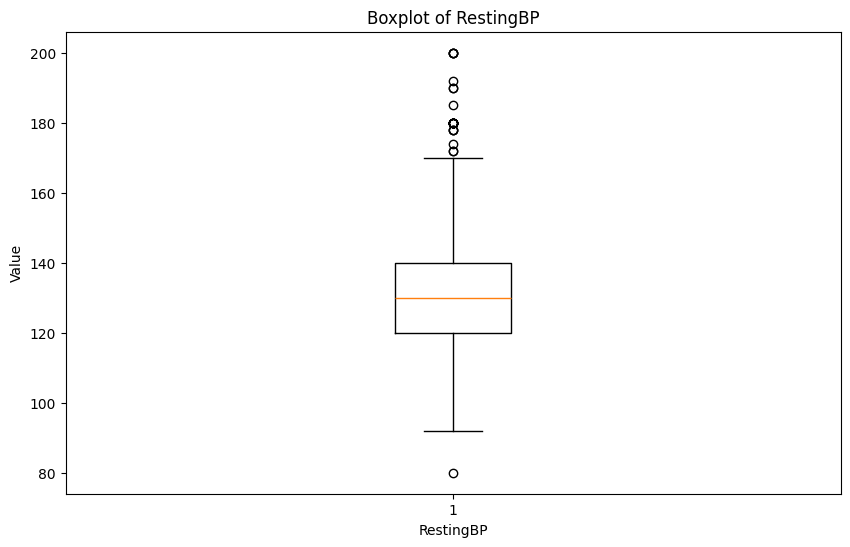

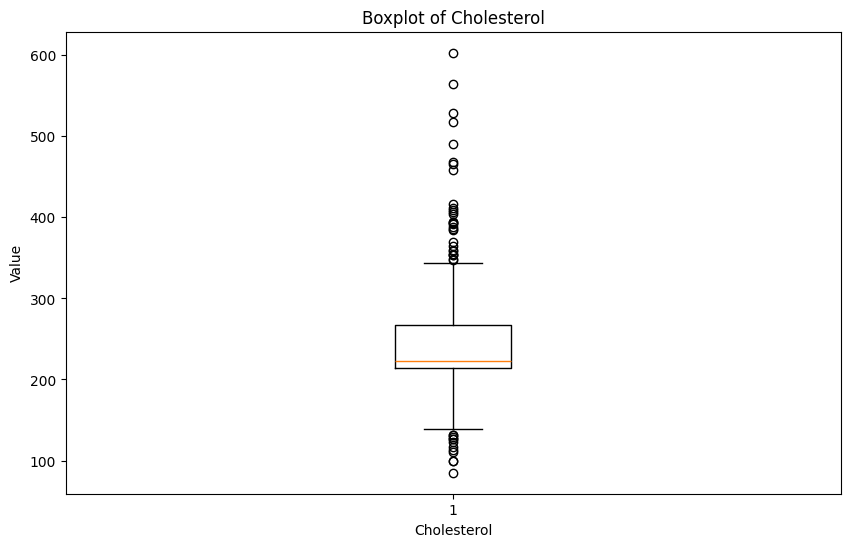

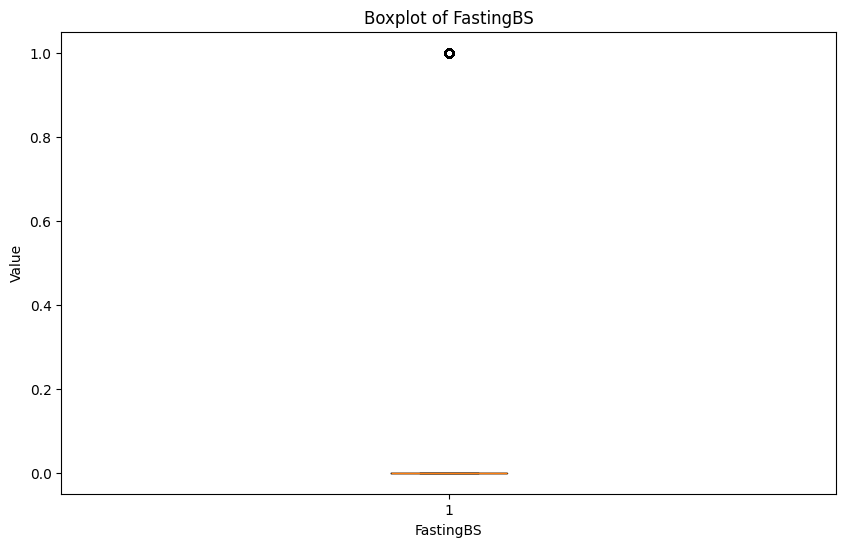

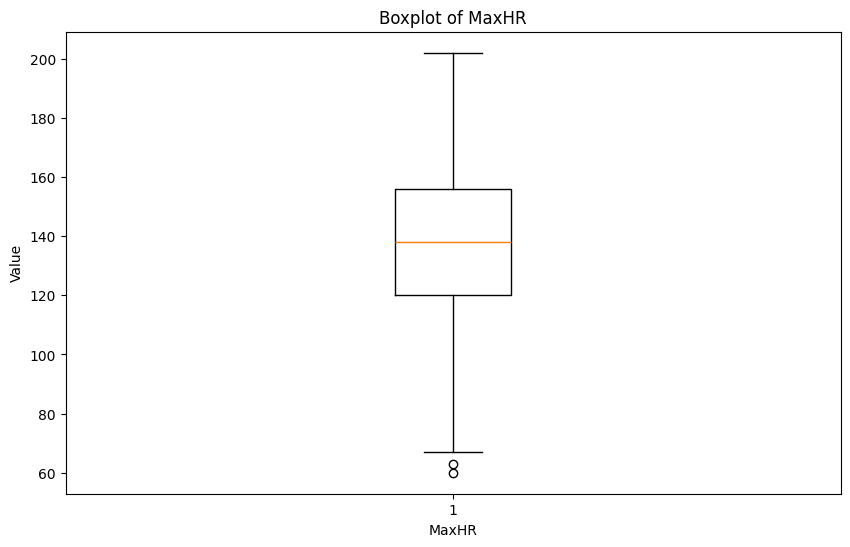

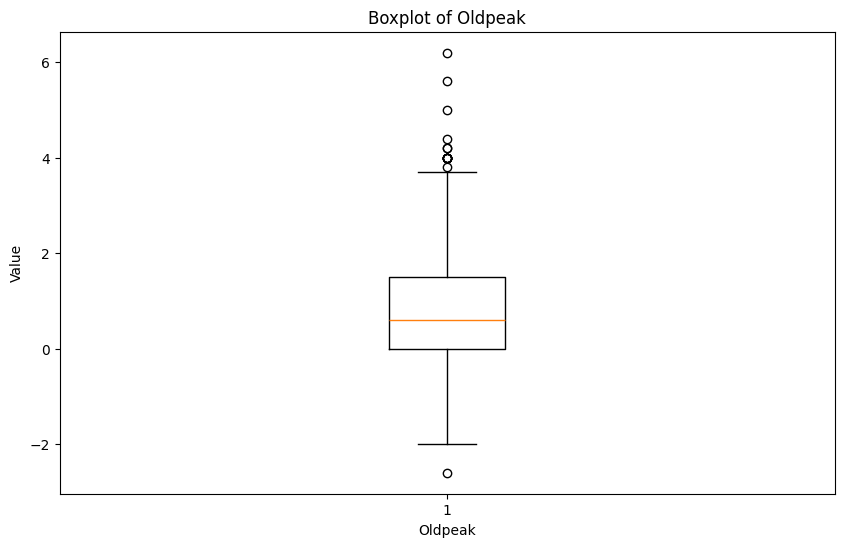

In [30]:
# Visualize distribution and potential outliers with boxplots
for feature in ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

In [31]:
# Initialize a set to store indices of rows to remove
outlier_indices = set()

# Identify and collect indices of outliers for each feature
for feature in ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Identify outliers for the current feature
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_indices.update(outliers.index)  # Collect outlier indices

    # Print detected outliers for the current feature
    print(f"Outliers for {feature}:")
    print(outliers[feature])
    print('*' * 50)

# Remove all collected outliers from the DataFrame
df = df.drop(index=outlier_indices).reset_index(drop=True)

print("Outliers removed across selected features.")


Outliers for RestingBP:
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64
**************************************************
Outliers for Cholesterol:
28     468
30     518
58     365
69     412
76     529
78     100
98      85
102    392
103    466
108    129
123    393
132    388
149    603
182    404
208    132
227    117
238    355
250    491
256    394
263    126
278    347
284    358
444    100
496    458
498    384
522    349
541    113
571    110
573    123
577    369
613    385
616    564
624    407
667    417
675    126
686    354
738    360
796    409
803    394
872    353
915    131
Name: Cholesterol, dtype: int64
**************************************************
Outliers for FastingBS:
36     1
38   

# Splitting data for training and testing

In [32]:
# Divide data into dependent and independent
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [33]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,41,120,157,0,182,0.0,True,True,False,False,True,False,False,False,True
639,57,140,241,0,123,0.2,False,False,False,False,True,False,True,True,False
640,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
641,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [34]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
638,0
639,1
640,1
641,1


In [35]:
from sklearn.model_selection import train_test_split
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
329,58,120,223,0,106,1.5,True,False,False,False,False,False,True,False,False
29,56,130,167,0,114,0.0,True,False,True,False,True,False,False,False,True
600,60,140,185,0,155,3.0,True,False,True,False,False,False,False,True,False
575,54,120,258,0,147,0.4,True,False,True,False,False,False,False,True,False
433,61,140,207,0,138,1.9,True,False,False,False,False,False,True,False,True


In [37]:
# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

Visualize relationships between features and the target variable.

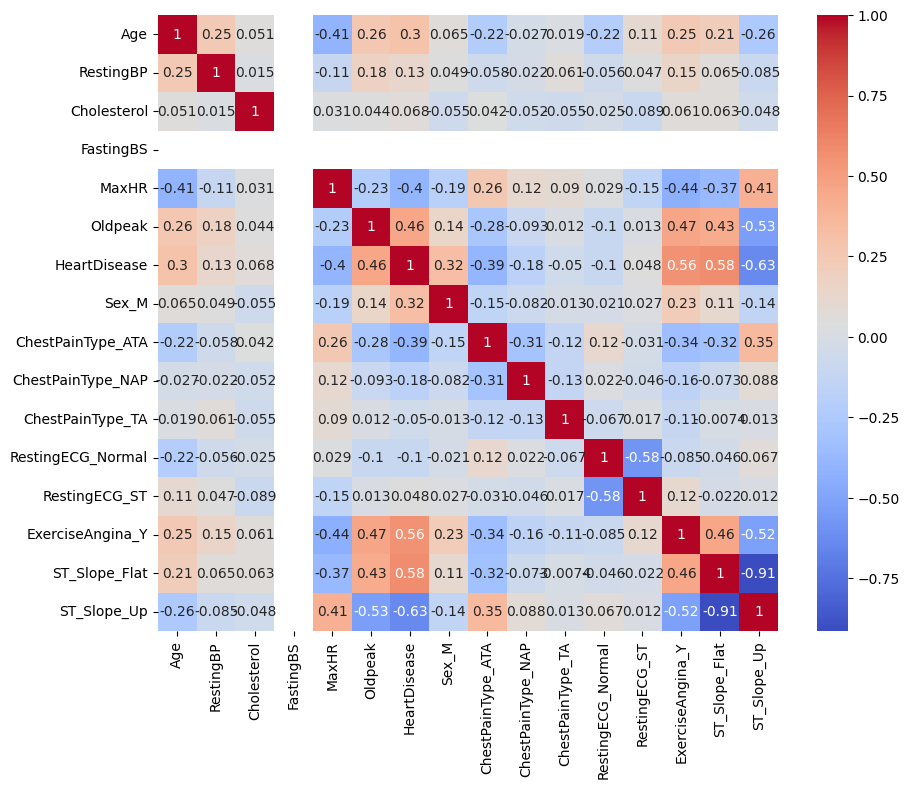

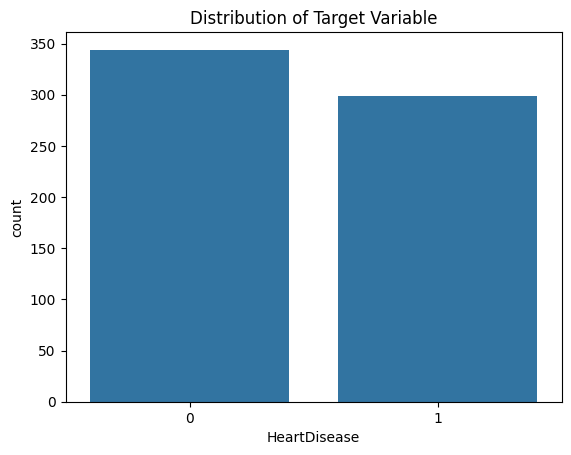

In [38]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.show()


#Model Performance

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import joblib

In [40]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 30)


Model: KNN
Accuracy: 0.8294573643410853
Precision: 0.8
Recall: 0.8275862068965517
Confusion Matrix:
 [[59 12]
 [10 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        71
           1       0.80      0.83      0.81        58

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129

------------------------------
Model: Logistic Regression
Accuracy: 0.8449612403100775
Precision: 0.8392857142857143
Recall: 0.8103448275862069
Confusion Matrix:
 [[62  9]
 [11 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.84      0.81      0.82        58

    accuracy                           0.84       129
   macro avg       0.84      0.84      0.84       129
weighted avg       0.84      0.84      0.84       1

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8372093023255814
Precision: 0.8490566037735849
Recall: 0.7758620689655172
Confusion Matrix:
 [[63  8]
 [13 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        71
           1       0.85      0.78      0.81        58

    accuracy                           0.84       129
   macro avg       0.84      0.83      0.83       129
weighted avg       0.84      0.84      0.84       129

------------------------------




*  Random Forest: Achieved the highest accuracy of 0.8759 with both precision and recall at 0.8621. The confusion matrix indicated effective classification with 63 true negatives and 50 true positives.

* Logistic Regression: Reached an accuracy of 0.8450 with slightly lower precision and recall compared to Random Forest, performing well overall.

* KNN and SVC: Both models showed an accuracy of 0.8295, with KNN having a better recall for class 1 (0.8276) than SVC (0.7759).

* AdaBoost: Demonstrated adequate performance with an accuracy of 0.8372, although its recall for class 1 was relatively lower (0.7759).




# Use of SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on the SMOTE-balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate on test set
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.875968992248062
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.86      0.86      0.86        58

    accuracy                           0.88       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.88      0.88      0.88       129

Confusion Matrix:
 [[63  8]
 [ 8 50]]


The application of SMOTE improved model performance significantly. The retrained Random Forest model after balancing classes achieved a testing accuracy of 0.8759, indicating that addressing class imbalance was beneficial.

# Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}


In [44]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate and print accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy of the best model on the test set:", accuracy_test)

Accuracy of the best model on the test set: 0.8837209302325582


In [49]:
print("Training Score : ", rf.score( X_train, y_train ))
print("Testing Score : ", rf.score( X_test, y_test ))
print("accuracy_score : ", accuracy_score( y_test, y_pred ))

Training Score :  0.9747081712062257
Testing Score :  0.8604651162790697
accuracy_score :  0.8837209302325582


GridSearchCV was utilized to find the best parameters for Random Forest, leading to a testing accuracy of 0.8837. This emphasizes the importance of tuning hyperparameters for optimizing model results.

# **CONCLUSION** :

The evaluation of multiple classification models revealed that the Random Forest model emerged as the most effective choice for the task at hand, achieving an accuracy of 0.8759 and demonstrating strong precision and recall values. The model's robust performance can be attributed to its ability to effectively handle the complexities of the dataset, particularly after applying SMOTE to address class imbalance, which further enhanced predictive accuracy.

While Logistic Regression provided a solid alternative with an accuracy of 0.8450, other models such as KNN, SVC, and AdaBoost displayed lower performance metrics, highlighting the varying capabilities of different algorithms in this context. Notably, the Random Forest model's performance improved further through hyperparameter tuning with GridSearchCV, leading to a testing accuracy of 0.8837, underscoring the significance of fine-tuning model parameters for optimal results.

The findings advocate for the continued use of the Random Forest model due to its superior performance and reliability. Future work could involve exploring additional tuning techniques, ensemble methods, and ensuring consistent evaluation metrics across all models to refine the predictive capabilities further. This approach will not only enhance model performance but also contribute to more accurate decision-making in real-world applications.

SAVE MODEL

In [50]:
import numpy as np
import pandas as pd
import joblib

# Load your trained heart failure model
model = joblib.load('heart_failure_model.pkl')

**Heart Disease Risk Prediction Using a Trained Model**

In [51]:
new_data = pd.DataFrame({
    'Age': [60],
    'RestingBP': [140],
    'Cholesterol': [220],
    'FastingBS': [1],  # Assuming 1 means high fasting blood sugar
    'MaxHR': [150],
    'Oldpeak': [2.3],
    # 'HeartDisease': [1],  # Remove this column as it's the target variable
    'Sex_M': [1],  # Assuming 1 for Male, 0 for Female
    'ChestPainType_ATA': [1],  # Assuming this is the encoded column for the patient's chest pain type
    'ChestPainType_NAP': [0],
    'ChestPainType_TA': [0],
    'RestingECG_Normal': [1],  # Assuming 1 for Normal ECG, 0 otherwise
    'RestingECG_ST': [0],
    'ExerciseAngina_Y': [1],  # Assuming 1 for presence of angina, 0 otherwise
    'ST_Slope_Flat': [1],  # Assuming 1 for flat slope
    'ST_Slope_Up': [0]
})


prediction = model.predict(new_data.values)

# Interpretation of prediction (assuming binary classification: 0 = Low Risk, 1 = High Risk)
if prediction[0] == 1:
    result = "High Risk of Heart Disease"
else:
    result = "Low Risk of Heart Disease"

# Display the result
print(f"Prediction: {result}")

Prediction: High Risk of Heart Disease
